<a href="https://colab.research.google.com/github/oulbacha-ilyas/QALHATATech-ltd-Eye-Fixations-Prediction/blob/main/AFTAS_descriptiveStats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**# 1.Overview of the project:**

**Overview of the AFTAS project during my internship at QALHATA Technologies **:
Gaze behaviors of a pilot are an essential avenue for gaining insights into the inner workings of the Pilot's operational efficiencies. Given the close relationship between the allocation of attention resources to various information modalities in a cockpit and the resultant efficacy of task performance, building an ML model that can track a pilot's eye fixations in a typical environment (cockpit) is considered a natural progression from models such as the SEEV model.

Analysis of current experimental results of this project, suggests that contextualizing the model building to typical cockpit surfaces(ECAM, EFIS, PFD) - our selected Areas of Interest (AoIs) - yields more accurate model outputs than the case of building models on data of the entire flying cycle. - (REF Paper here)
The ultimate objective is to be able to determine the gaze characteristics (which can be indicators of cognitive processing) of a pilot, upon which targeted training programs for mitigating human factors may be enabled. Furthermore, it would be useful for a pilot in training for example, who benefits from being able to compare task performance outputs against more experienced pilots.

For this purpose, the comparisons must be made against appropriate metrics. The following are considered:
duration spent on a surface, frequency of entry and exits relative to the surface, the position of fixations inside a surface....etc. All these metrics are analyzed for a typical flying behavior of a pilot carrying out a recommended flying task.

These first iterations of the modeling and associated analytical outputs, aim to demonstrate the feasibility of an Advanced Flight Training Analytics Service (AFTAS) by Qalhata Technologies Ltd - UK Based Science, Engineering, and Technology Startup.


This project is split into 2 parts: the first focus on the descriptive statistics of the collection to demystify any possible relations between the variables, comparing the predictability of two models: ANN and LR. The chosen model will be then used on instructor(Pilot) data and implemented as the base model to analyze other pilots' performances. The second part consists of creating a dashboard, using the vanilla Library, to visualize the performance of a pilot based on his previous attempts at flight simulation, and in a group with other pilots for the same simulation.

Both models( ANN and LR) have similar accuracies in different scenarios(1 predictor or multiple predictors).
Two conclusions can be drawn from our analysis :
1. The case of using one predictor(duration) enables higher accuracies than the other combinations of predictors.
2. In all the scenarios, the LR outperforms slightly the ANN.

However, the tests of correlation prove that there is no significant relationship between the predictor(duration) and target variable(fixation x [px]). Therefore, the accuracies of LR may not be consistent as it assumes a natural correlation between the predictor and predictand. Hence, the non-linear regression model, ANN, is the best model to choose.

# **2.Import necessary libraries and explore the datasets:**

In [ ]:
import pandas as pd 
import numpy as np

import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler 
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import statistics

# load from local machine
#upload these files
#blinks.csv 
#fixations.csv 
#fixations-ecam.csv 
#fixations-efis.csv
#fixations-pfd.csv 
#gaze.csv 
#world_timestamps.csv 

from google.colab import files

uploadedfile1 = files.upload()

Alternative load options: For working with files locally - 
A sample dataset is provided in the github repo for the public to download for testing out the code - Or we just host the data somewhere and let the data auto load for anyone who wants to play with the data.


In [ ]:
# Fixations on all surfaces

fixData=pd.read_csv("fixations.csv")
fixData.head()

,section id,recording id,fixation id,start timestamp [ns],end timestamp [ns],duration [ms],fixation x [px],fixation y [px]
0,9d485631-d3e7-4b9e-9846-86c24d17cd85,12cadca8-c51a-4d86-af40-408bb0fd9381,1,1649868268232374069,1649868268384158069,151,237.883,461.977
1,9d485631-d3e7-4b9e-9846-86c24d17cd85,12cadca8-c51a-4d86-af40-408bb0fd9381,2,1649868268476134069,1649868269320080069,843,285.147,511.359
2,9d485631-d3e7-4b9e-9846-86c24d17cd85,12cadca8-c51a-4d86-af40-408bb0fd9381,3,1649868269604296069,1649868269824016069,219,664.579,428.656
3,9d485631-d3e7-4b9e-9846-86c24d17cd85,12cadca8-c51a-4d86-af40-408bb0fd9381,4,1649868270087945069,1649868270447963069,360,673.736,435.751
4,9d485631-d3e7-4b9e-9846-86c24d17cd85,12cadca8-c51a-4d86-af40-408bb0fd9381,5,1649868270476468069,1649868270852291069,375,631.719,367.296


In [ ]:
fixData.describe()

,fixation id,start timestamp [ns],end timestamp [ns],duration [ms],fixation x [px],fixation y [px]
count,1023.000000,1.023000e+03,1.023000e+03,1023.000000,1023.000000,1023.000000
mean,512.000000,1.649869e+18,1.649869e+18,475.372434,573.489254,588.973796
std,295.458965,1.749428e+11,1.749531e+11,576.859891,134.203456,112.126256
min,1.000000,1.649868e+18,1.649868e+18,63.000000,151.086000,291.031000
25%,256.500000,1.649868e+18,1.649868e+18,216.000000,485.183500,490.695000
50%,512.000000,1.649869e+18,1.649869e+18,324.000000,537.795000,626.875000
75%,767.500000,1.649869e+18,1.649869e+18,542.000000,670.053000,661.868000
max,1023.000000,1.649869e+18,1.649869e+18,10239.000000,1026.711000,926.416000


In [ ]:
# Fixations on EFIS surface:
fixdataEfis=pd.read_csv("fixations-efis.csv")
fixdataEfis = fixdataEfis[fixdataEfis["fixation detected on surface"] == True]
fixdataEfis.head()

,section id,recording id,fixation id,start timestamp [ns],end timestamp [ns],duration [ms],fixation detected on surface,fixation x [normalized],fixation y [normalized]


In [ ]:
fixdataEfis.describe()

,fixation id,start timestamp [ns],end timestamp [ns],duration [ms],fixation x [normalized],fixation y [normalized]
count,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Fixations on ECAM surface:
fixdataEcam=pd.read_csv("fixations-ecam.csv")
fixdataEcam=fixdataEcam[fixdataEcam["fixation detected on surface"]==True]
fixdataEcam.head()

,section id,recording id,fixation id,start timestamp [ns],end timestamp [ns],duration [ms],fixation detected on surface,fixation x [normalized],fixation y [normalized]
131,9d485631-d3e7-4b9e-9846-86c24d17cd85,12cadca8-c51a-4d86-af40-408bb0fd9381,138,1649868328124327069,1649868329820218069,1695,True,0.635458,0.413579
132,9d485631-d3e7-4b9e-9846-86c24d17cd85,12cadca8-c51a-4d86-af40-408bb0fd9381,139,1649868329836012069,1649868330180279069,344,True,0.286747,0.331690
133,9d485631-d3e7-4b9e-9846-86c24d17cd85,12cadca8-c51a-4d86-af40-408bb0fd9381,140,1649868330195976069,1649868330456131069,260,True,0.507013,0.373839
134,9d485631-d3e7-4b9e-9846-86c24d17cd85,12cadca8-c51a-4d86-af40-408bb0fd9381,141,1649868330476077069,1649868330816158069,340,True,0.204077,0.314589
135,9d485631-d3e7-4b9e-9846-86c24d17cd85,12cadca8-c51a-4d86-af40-408bb0fd9381,142,1649868330836071069,1649868331700234069,864,True,0.541307,0.376732


In [ ]:
fixdataEcam.describe()

,fixation id,start timestamp [ns],end timestamp [ns],duration [ms],fixation x [normalized],fixation y [normalized]
count,7.000000,7.000000e+00,7.000000e+00,7.000000,7.000000,7.000000
mean,141.571429,1.649868e+18,1.649868e+18,646.000000,0.427753,0.368993
std,3.309438,1.675682e+09,1.518061e+09,516.434894,0.148871,0.042956
min,138.000000,1.649868e+18,1.649868e+18,260.000000,0.204077,0.314589
25%,139.500000,1.649868e+18,1.649868e+18,324.000000,0.344718,0.336468
50%,141.000000,1.649868e+18,1.649868e+18,344.000000,0.416976,0.373839
75%,142.500000,1.649868e+18,1.649868e+18,787.500000,0.524160,0.395155
max,148.000000,1.649868e+18,1.649868e+18,1695.000000,0.635458,0.431273


In [ ]:
# Fixations on PFD surface:
fixdataPfd=pd.read_csv("fixations-pfd.csv")
fixdataPfd=fixdataPfd[fixdataPfd["fixation detected on surface"]==True]
fixdataPfd.head()

,section id,recording id,fixation id,start timestamp [ns],end timestamp [ns],duration [ms],fixation detected on surface,fixation x [normalized],fixation y [normalized]
92,23769acc-a80d-4c56-ba93-1084625cc5d0,55de2ded-00a2-4b06-b882-77fa8f646c10,145,1649867023157537731,1649867024117582731,960,True,0.340135,0.690038
93,23769acc-a80d-4c56-ba93-1084625cc5d0,55de2ded-00a2-4b06-b882-77fa8f646c10,146,1649867024129729731,1649867026433828731,2304,True,0.459524,0.543168
212,9d485631-d3e7-4b9e-9846-86c24d17cd85,12cadca8-c51a-4d86-af40-408bb0fd9381,185,1649868352808562069,1649868353176660069,368,True,0.323678,0.445556
236,9d485631-d3e7-4b9e-9846-86c24d17cd85,12cadca8-c51a-4d86-af40-408bb0fd9381,218,1649868376588738069,1649868377204699069,615,True,0.313367,0.224144
241,9d485631-d3e7-4b9e-9846-86c24d17cd85,12cadca8-c51a-4d86-af40-408bb0fd9381,223,1649868381612816069,1649868381940689069,327,True,0.127699,0.238502


In [ ]:
fixdataPfd.describe()

,fixation id,start timestamp [ns],end timestamp [ns],duration [ms],fixation x [normalized],fixation y [normalized]
count,72.000000,7.200000e+01,7.200000e+01,72.000000,72.000000,72.000000
mean,325.930556,1.649868e+18,1.649868e+18,537.625000,0.327922,0.426852
std,71.814379,2.420953e+11,2.419012e+11,446.301055,0.184511,0.178020
min,145.000000,1.649867e+18,1.649867e+18,71.000000,0.023650,0.042575
25%,265.500000,1.649868e+18,1.649868e+18,236.000000,0.208847,0.352997
50%,334.500000,1.649868e+18,1.649868e+18,381.000000,0.307524,0.481832
75%,384.250000,1.649868e+18,1.649868e+18,639.250000,0.376133,0.535663
max,447.000000,1.649869e+18,1.649869e+18,2304.000000,0.853277,0.835441


In the next sections we are discussing the distribution of features.Based on our previous project, the distribution of fixations has serious impact on the model accuracy.This impact is more pronounced when using Linear Regression. In the next cells,we present a comparison of accuracies between LR and ANN in different scenarios:whole predictors,1 selected predictor, based on separate surfaces or all surfaces toghether.After examining all these scenarios,one specific model is selected for the comparison.

In [ ]:
world_timestamps=pd.read_csv("world_timestamps.csv")
world_timestamps.head()

,section id,recording id,timestamp [ns]
0,9d485631-d3e7-4b9e-9846-86c24d17cd85,12cadca8-c51a-4d86-af40-408bb0fd9381,1649868266477000000
1,9d485631-d3e7-4b9e-9846-86c24d17cd85,12cadca8-c51a-4d86-af40-408bb0fd9381,1649868266527000000
2,9d485631-d3e7-4b9e-9846-86c24d17cd85,12cadca8-c51a-4d86-af40-408bb0fd9381,1649868266577000000
3,9d485631-d3e7-4b9e-9846-86c24d17cd85,12cadca8-c51a-4d86-af40-408bb0fd9381,1649868266627000000
4,9d485631-d3e7-4b9e-9846-86c24d17cd85,12cadca8-c51a-4d86-af40-408bb0fd9381,1649868266677000000


In [ ]:
# Combining fixations and blinks for richer insights
fixdf = pd.read_csv("fixations.csv")
blinkdf = pd.read_csv("blinks.csv")
gazedf = pd.read_csv("gaze.csv")

fixdf.rename (columns={"section id":"fix section id","recording id":"fix recording id","start timestamp [ns]":"fix start timestamp [ns]","end timestamp [ns]":"fix end timestamp [ns]",'duration [ms]': 'fix_duration [ms]'}, inplace = True)
blinkdf.rename (columns={"section id":"blink section id","recording id":"blink recording id","start timestamp [ns]":"blink start timestamp [ns]","end timestamp [ns]":"blink end timestamp [ns]",'duration [ms]': 'blink_duration [ms]'}, inplace = True)
fixdf.head()

,fix section id,fix recording id,fixation id,fix start timestamp [ns],fix end timestamp [ns],fix_duration [ms],fixation x [px],fixation y [px]
0,9d485631-d3e7-4b9e-9846-86c24d17cd85,12cadca8-c51a-4d86-af40-408bb0fd9381,1,1649868268232374069,1649868268384158069,151,237.883,461.977
1,9d485631-d3e7-4b9e-9846-86c24d17cd85,12cadca8-c51a-4d86-af40-408bb0fd9381,2,1649868268476134069,1649868269320080069,843,285.147,511.359
2,9d485631-d3e7-4b9e-9846-86c24d17cd85,12cadca8-c51a-4d86-af40-408bb0fd9381,3,1649868269604296069,1649868269824016069,219,664.579,428.656
3,9d485631-d3e7-4b9e-9846-86c24d17cd85,12cadca8-c51a-4d86-af40-408bb0fd9381,4,1649868270087945069,1649868270447963069,360,673.736,435.751
4,9d485631-d3e7-4b9e-9846-86c24d17cd85,12cadca8-c51a-4d86-af40-408bb0fd9381,5,1649868270476468069,1649868270852291069,375,631.719,367.296


In [ ]:
bigdf = pd.concat([world_timestamps["timestamp [ns]"],fixdf, blinkdf], axis=1, ignore_index=False)
#bigdf['FixTimeElapsed [ms]'] = (bigdf['end timestamp [ns]'] - bigdf['start timestamp [ns]'])/1000000
bigdf.head()

,timestamp [ns],fix section id,fix recording id,fixation id,fix start timestamp [ns],fix end timestamp [ns],fix_duration [ms],fixation x [px],fixation y [px],blink section id,blink recording id,blink id,blink start timestamp [ns],blink end timestamp [ns],blink_duration [ms]
0,1649868266477000000,9d485631-d3e7-4b9e-9846-86c24d17cd85,12cadca8-c51a-4d86-af40-408bb0fd9381,1.0,1.649868e+18,1.649868e+18,151.0,237.883,461.977,9d485631-d3e7-4b9e-9846-86c24d17cd85,12cadca8-c51a-4d86-af40-408bb0fd9381,1.0,1.649868e+18,1.649868e+18,400.0
1,1649868266527000000,9d485631-d3e7-4b9e-9846-86c24d17cd85,12cadca8-c51a-4d86-af40-408bb0fd9381,2.0,1.649868e+18,1.649868e+18,843.0,285.147,511.359,9d485631-d3e7-4b9e-9846-86c24d17cd85,12cadca8-c51a-4d86-af40-408bb0fd9381,2.0,1.649868e+18,1.649868e+18,384.0
2,1649868266577000000,9d485631-d3e7-4b9e-9846-86c24d17cd85,12cadca8-c51a-4d86-af40-408bb0fd9381,3.0,1.649868e+18,1.649868e+18,219.0,664.579,428.656,9d485631-d3e7-4b9e-9846-86c24d17cd85,12cadca8-c51a-4d86-af40-408bb0fd9381,3.0,1.649868e+18,1.649868e+18,532.0
3,1649868266627000000,9d485631-d3e7-4b9e-9846-86c24d17cd85,12cadca8-c51a-4d86-af40-408bb0fd9381,4.0,1.649868e+18,1.649868e+18,360.0,673.736,435.751,9d485631-d3e7-4b9e-9846-86c24d17cd85,12cadca8-c51a-4d86-af40-408bb0fd9381,4.0,1.649868e+18,1.649868e+18,416.0
4,1649868266677000000,9d485631-d3e7-4b9e-9846-86c24d17cd85,12cadca8-c51a-4d86-af40-408bb0fd9381,5.0,1.649868e+18,1.649868e+18,375.0,631.719,367.296,9d485631-d3e7-4b9e-9846-86c24d17cd85,12cadca8-c51a-4d86-af40-408bb0fd9381,5.0,1.649868e+18,1.649868e+18,364.0


**# A.Descriptive Statistics:**

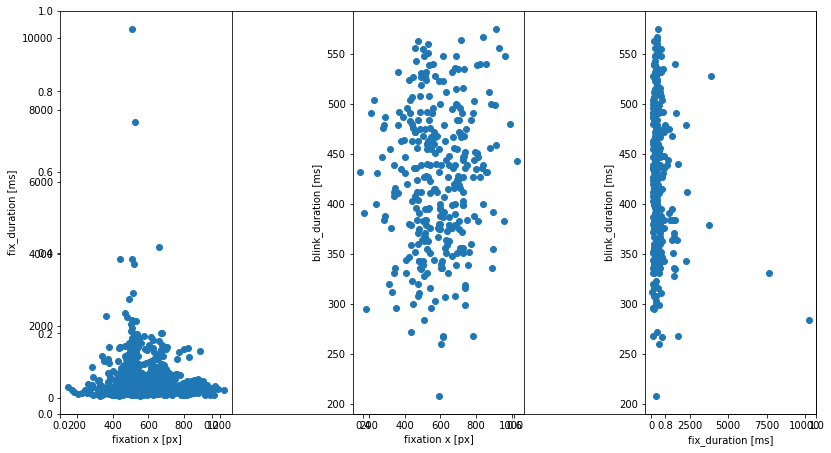

In [ ]:
# checking the distribution using graphical methods:
# Graphical method 1 : scatter plots 

from matplotlib.pylab import title
from scipy.stats import shapiro
from scipy.stats import kstest
import matplotlib.gridspec as gridspec

import seaborn as sns

import scipy.stats as stats
import statsmodels.api as sm
import pylab as py

fig, axes = plt.subplots()
gs = gridspec.GridSpec(1,3, figure=fig)

ax0 = fig.add_subplot(gs[0])
ax1 = fig.add_subplot(gs[1])
ax2 = fig.add_subplot(gs[2])


ax0.scatter('fixation x [px]', 'fix_duration [ms]', data=bigdf)

ax0.set_xlabel("fixation x [px]")
ax0.set_ylabel("fix_duration [ms]")
#ax0.show()
#plt.scatter('fixation x [px]', 'blink_duration [ms]', data=bigdf)
ax1.scatter('fixation x [px]', 'blink_duration [ms]', data=bigdf)

ax1.set_xlabel("fixation x [px]")
ax1.set_ylabel("blink_duration [ms]")
#ax1.show()

#plt.scatter('fix_duration [ms]', 'blink_duration [ms]', data=bigdf)
ax2.scatter('fix_duration [ms]', 'blink_duration [ms]', data=bigdf)

ax2.set_xlabel("fix_duration [ms]")
ax2.set_ylabel("blink_duration [ms]")
#ax2.show()

fig.set_figheight(7)
fig.set_figwidth(14)

plt.subplots_adjust(left=0.05,
                    bottom=0.1, 
                    right=0.8, 
                    top=0.9, 
                    wspace=0.7, 
                    hspace=0.7)


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


Text(0, 0.5, 'Value')

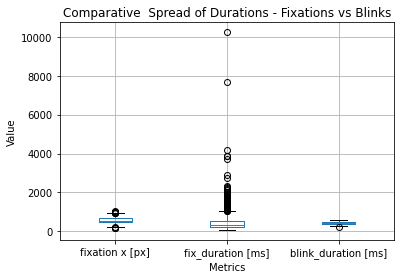

In [ ]:
# Graphical method 2 :Boxplots 

bigdf.boxplot(column=['fixation x [px]','fix_duration [ms]', 'blink_duration [ms]'], grid=True)
plt.title("Comparative  Spread of Durations - Fixations vs Blinks")
plt.xlabel("Metrics")
plt.ylabel("Value")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

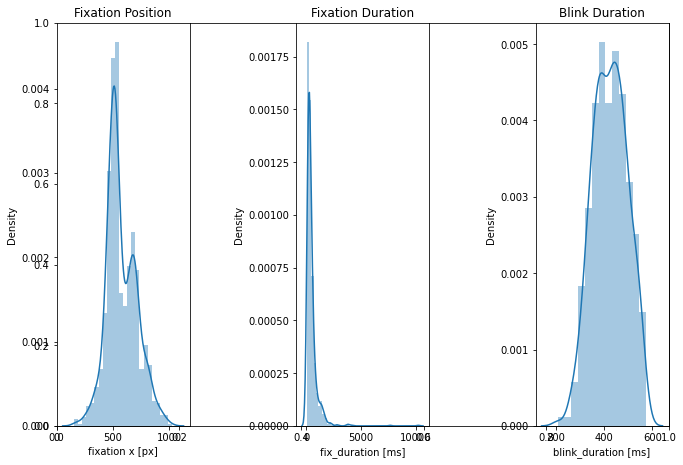

In [ ]:
## Graphical method 3 :Displots 

fig, axes = plt.subplots()
gs = gridspec.GridSpec(1,3, figure=fig)

ax0 = fig.add_subplot(gs[0])
ax1 = fig.add_subplot(gs[1])
ax2 = fig.add_subplot(gs[2])

sns.distplot(bigdf['fixation x [px]'],ax=ax0).set(title="Fixation Position")
sns.distplot(bigdf['fix_duration [ms]'],ax=ax1).set(title="Fixation Duration")
sns.distplot(bigdf['blink_duration [ms]'],ax=ax2).set(title="Blink Duration")


fig.set_figheight(7)
fig.set_figwidth(10)

plt.subplots_adjust(left=0.05,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.8, 
                    hspace=0.3)

We observe that none of the variables has a perfect normal distribution.However,the "Fixations x[px]" seems to follow a bimodal normal distribution.In the next sections,we devide the "Fixation x [px]" based on their surface and check if they have similar distributions.

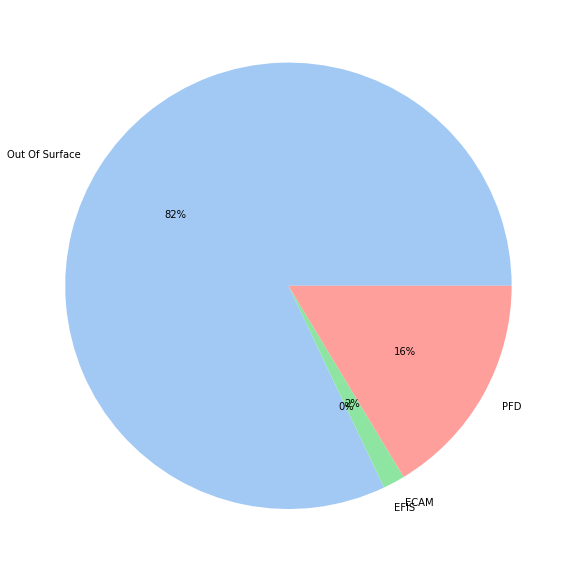

In [ ]:
#Determining the fixations that were out of all surfaces : The fixations out surface are all the same for each surface,we can check that from "fixation id"
out_surface=pd.read_csv("fixations-efis.csv")
out_surface=out_surface[out_surface["fixation detected on surface"]==False]


#The portions of fixations of each surface :

colors = sns.color_palette('pastel')[0:5]
portions=pd.DataFrame(columns=["Out Of Surface","EFIS","ECAM","PFD"])

a=out_surface['fixation x [normalized]'].notnull().count()
b=fixdataEfis['fixation x [normalized]'].notnull().count()
c=fixdataEcam['fixation x [normalized]'].notnull().count()
d=fixdataPfd['fixation x [normalized]'].notnull().count()
portions=[a,b,c,d]
labels=['Out Of Surface','EFIS','ECAM','PFD']

#
fig = plt.figure(figsize=(10,12))
plt.pie(portions,labels=labels,colors = colors, autopct='%.0f%%')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2657: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcou

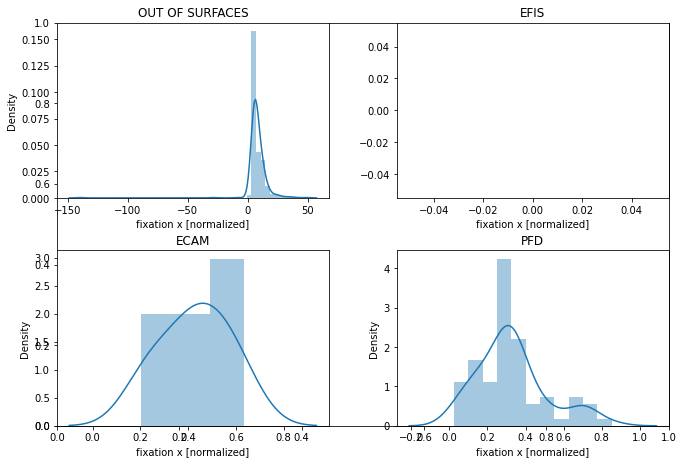

In [ ]:
# Graphical method 4 :Displots for fixations on different surfaces


fig, axes = plt.subplots()
gs = gridspec.GridSpec(2, 2, figure=fig)

ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])
ax2 = fig.add_subplot(gs[1, 0])
ax3 = fig.add_subplot(gs[1, 1])

#Determining the fixations that were out of all surfaces : The fixations out surface are all the same for each surface,we can check that from "fixation id"
out_surface=pd.read_csv("fixations-efis.csv")
out_surface=out_surface[out_surface["fixation detected on surface"]==False]

#Plotting the distribution
sns.distplot(out_surface['fixation x [normalized]'],ax=ax0).set(title="OUT OF SURFACES")
sns.distplot(fixdataEfis['fixation x [normalized]'],ax=ax1).set(title="EFIS")
sns.distplot(fixdataEcam['fixation x [normalized]'],ax=ax2).set(title="ECAM")
sns.distplot(fixdataPfd['fixation x [normalized]'],ax=ax3).set(title="PFD")

fig.set_figheight(7)
fig.set_figwidth(10)

plt.subplots_adjust(left=0.05,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.25, 
                    hspace=0.3)


**# B.Statistical tests:**

In [ ]:
# Statistical tests for the normality check of fixations and blinks

from scipy.stats import anderson
from scipy.stats import kstest
from scipy.stats import shapiro

normality=pd.DataFrame(columns=['Dataset','Shapiro statistic','P-value','Kolmogrov statistic','P-value'])
normality['Dataset']=['Fixations Position','Fixations Duration','Blinks']

fixPosition=bigdf['fixation x [px]'][bigdf['fixation x [px]'].notnull()].values.tolist()
fixDuration=bigdf['fix_duration [ms]'][bigdf['fix_duration [ms]'].notnull()].values.tolist()
blinks=bigdf['blink_duration [ms]'][bigdf['blink_duration [ms]'].notnull()].values.tolist()
#Shapiro-Wilk Test
s0,p0=shapiro(fixPosition)
s1,p1=shapiro(fixDuration)
s2,p2=shapiro(blinks)


normality['Shapiro statistic']=[s0,s1,s2]
normality['P-value']=[p0,p1,p2]

#Kolmogrov-Smirnov Test
#fixations=bigdf['fix_duration [ms]'].values.tolist()

s0,p0=kstest(fixPosition, 'norm')
s1,p1=kstest(fixDuration, 'norm')
s2,p2=shapiro(blinks)


normality['Kolmogrov statistic']=[s0,s1,s2]
normality['P-value']=[p0,p1,p2]



print(normality)

              Dataset  Shapiro statistic   P-value  Kolmogrov statistic  \
0  Fixations Position           0.973931  0.000000             1.000000   
1  Fixations Duration           0.493980  0.000000             1.000000   
2              Blinks           0.990157  0.035201             0.990157   

    P-value  
0  0.000000  
1  0.000000  
2  0.035201  


In [ ]:
#Aderson-Darling test for fixations position distribution
anderson(fixPosition) 

AndersonResult(statistic=12.700686239006245, critical_values=array([0.574, 0.653, 0.784, 0.914, 1.088]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

In [ ]:
#Aderson-Darling test for fixations duration distribution
anderson(fixDuration)

AndersonResult(statistic=109.95011957076576, critical_values=array([0.574, 0.653, 0.784, 0.914, 1.088]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

In [ ]:
#Aderson-Darling test for fixations for blinks distribution
anderson(blinks)

AndersonResult(statistic=0.6742554559640439, critical_values=array([0.569, 0.648, 0.777, 0.907, 1.078]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

In [ ]:
print("For Fixations ,the test results are significant at any level of significance. \n Therefore, we have enough evidence to reject the null hypothesis regardless of the significant level.\nHence,the distribution of  blinks is not normal. \n For the blinks duration,the null hypothesis is rejected only for a significance level of 15%  ")


For Fixations ,the test results are significant at any level of significance. 
 Therefore, we have enough evidence to reject the null hypothesis regardless of the significant level.
Hence,the distribution of  blinks is not normal. 
 For the blinks duration,the null hypothesis is rejected only for a significance level of 15%  


In [ ]:
# Test of dependence using non-parametric tests :
#Test of dependence between fixation duration and fixations position

from scipy.stats import spearmanr 
from scipy.stats import kendalltau


#Spearman’s Rho
coef, p = spearmanr(fixDuration, fixPosition)
print('Spearmans correlation coefficient: %.3f' % coef)
alpha = 0.05
if p > alpha:
	print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p)
else:
	print('Samples are correlated (reject H0) p=%.3f' % p)
 
 
#Kendall’s Tau
coef, p = kendalltau(fixDuration, fixPosition)
print('\n kendall correlation coefficient: %.3f' % coef)

alpha = 0.05
if p > alpha:
	print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p)
else:
	print('Samples are correlated (reject H0) p=%.3f' % p)

Spearmans correlation coefficient: -0.050
Samples are uncorrelated (fail to reject H0) p=0.113

 kendall correlation coefficient: -0.036
Samples are uncorrelated (fail to reject H0) p=0.088


In [ ]:
import random

samples=pd.DataFrame(columns=['FixDuration','FixPosition','Blinks'])
samples['Blinks']=bigdf['blink_duration [ms]'][bigdf['blink_duration [ms]'].notnull()]
fixDuration_sample=random.sample(fixDuration, len(blinks))
samples['FixDuration']=fixDuration_sample
fixPosition_sample=random.sample(fixPosition, len(blinks))
samples['FixPosition']=fixPosition_sample

print(samples)
#samples['S2']=blinks


     FixDuration  FixPosition  Blinks
0          515.0      170.403   400.0
1         1196.0      521.959   384.0
2          324.0      493.745   532.0
3          280.0      381.478   416.0
4          724.0      685.577   364.0
..           ...          ...     ...
305        447.0      666.634   336.0
306        564.0      566.308   531.0
307        132.0      358.669   311.0
308       2344.0      482.707   503.0
309        220.0      732.138   415.0

[310 rows x 3 columns]


In [ ]:
import random
#Test of dependence between fixation duration and blinks

blinks =bigdf[bigdf['blink_duration [ms]'].notnull()]

#Spearman’s Rho
coef, p = spearmanr(samples['FixDuration'], samples['Blinks'])
print('Spearmans correlation coefficient: %.3f' % coef)
alpha = 0.05
if p > alpha:
	print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p)
else:
	print('Samples are correlated (reject H0) p=%.3f' % p)
 
 
#Kendall’s Tau
coef, p = kendalltau(samples['FixDuration'], samples['Blinks'])
print('\n kendall correlation coefficient: %.3f' % coef)

alpha = 0.05
if p > alpha:
	print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p)
else:
	print('Samples are correlated (reject H0) p=%.3f' % p)


Spearmans correlation coefficient: 0.097
Samples are uncorrelated (fail to reject H0) p=0.087

 kendall correlation coefficient: 0.064
Samples are uncorrelated (fail to reject H0) p=0.093


In [ ]:
#Test of dependence between fixations' position and blinks

#Spearman’s Rho to check monotonic relationship between
# where fixations fall in environment and blinks

coef, p = spearmanr(samples['FixPosition'], samples['Blinks'])
print('Spearmans correlation coefficient: %.3f' % coef)
alpha = 0.05
if p > alpha:
	print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p)
else:
	print('Samples are correlated (reject H0) p=%.3f' % p)
 
 
#Kendall’s Tau
coef, p = kendalltau(samples['FixPosition'], samples['Blinks'])
print('\n kendall correlation coefficient: %.3f' % coef)

alpha = 0.05
if p > alpha:
	print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p)
else:
	print('Samples are correlated (reject H0) p=%.3f' % p)

Spearmans correlation coefficient: 0.049
Samples are uncorrelated (fail to reject H0) p=0.387

 kendall correlation coefficient: 0.033
Samples are uncorrelated (fail to reject H0) p=0.393


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarnin

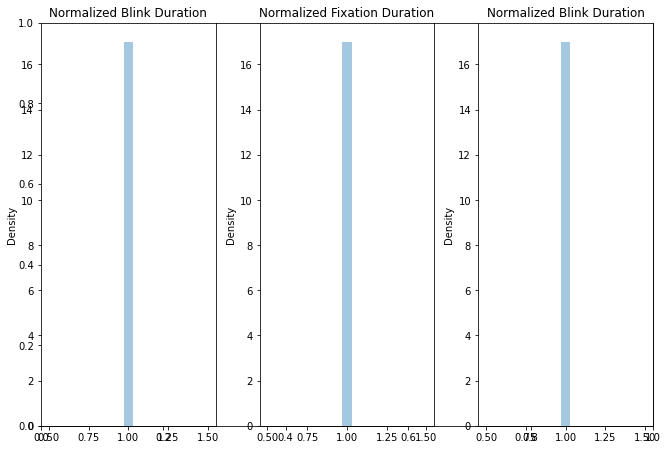

In [ ]:
# Parametric tests for independence 
# Pearson R
from scipy.stats import pearsonr 

# Transforming the data : none of the variables
# (fixations dur,blinks & fixations pos) has a normal distribution
from sklearn  import preprocessing
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler


nr=Normalizer
FixPosition=samples['FixPosition'].values.reshape(-1,1)
FixDuration=samples['FixDuration'].values.reshape(-1,1)
bliDuration=samples['Blinks'].notnull()
bliDuration=bliDuration.values.reshape(-1,1)

norm_fixposition=preprocessing.normalize(FixPosition)
norm_fixduration=preprocessing.normalize(FixDuration)
norm_bliduration=preprocessing.normalize(bliDuration)

# displots to visualize the fixations and blinks duration distribution

fig, axes = plt.subplots()
gs = gridspec.GridSpec(1,3, figure=fig)

ax0 = fig.add_subplot(gs[0])
ax1 = fig.add_subplot(gs[1])
ax2 = fig.add_subplot(gs[2])

sns.distplot(norm_fixposition,ax=ax0).set(title="Normalized Blink Duration")
sns.distplot(norm_fixduration,ax=ax1).set(title="Normalized Fixation Duration")
sns.distplot(norm_bliduration,ax=ax2).set(title="Normalized Blink Duration")

fig.set_figheight(7)
fig.set_figwidth(10)


plt.subplots_adjust(left=0.05,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.25, 
                    hspace=0.3)


In [ ]:
#creating a table of comparison

correlation=pd.DataFrame(columns=["Variables","R²","P-value"])

#Testing the correlation 
coef, p = pearsonr(norm_fixposition, norm_fixduration)
correlation=correlation.append({"Variables":"Fixations' Position and Fixations' Duration","R²":coef,"P-value":p},ignore_index=True)

coef, p = pearsonr(norm_fixposition, norm_bliduration)
correlation=correlation.append({"Variables":"Fixations' Position and Blinks' Duration","R²":coef,"P-value":p},ignore_index=True)

coef, p = pearsonr(norm_fixduration, norm_bliduration)
correlation=correlation.append({"Variables":"Fixations' Duration and Blinks' Duration","R²":coef,"P-value":p},ignore_index=True)


print(correlation)

                                     Variables   R² P-value
0  Fixations' Position and Fixations' Duration  NaN     NaN
1     Fixations' Position and Blinks' Duration  NaN     NaN
2     Fixations' Duration and Blinks' Duration  NaN     NaN


/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:4023: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())


All the tests denied the dependence between all the selected variables(fixations position,fixations duration and blinks)

**# 2.Machine Learning Models comparison:**

In [ ]:
# Building the prediction model using linear regression  in all features : start_timestamp,end_timestamp,duration,fixations x [px]

import operator

import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer



##set the table of comparison
results_lr=pd.DataFrame(columns=['Surface','RMSE Training','RMSE Testing','R²','Adjusted-R²'])



### LR considering the whole dataset(ALL SURFACES)
X=fixData[["start timestamp [ns]","end timestamp [ns]","duration [ms]"]]
y=fixData["fixation x [px]"]

####split the data

X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.3, random_state=0)

sc= Normalizer()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)
model = LinearRegression()
model.fit(X_train,y_train)

####evaluate the model

y_pred = model.predict(X_test)
y_pred_train = model.predict(X_train)

rmse=np.sqrt(mean_squared_error(y_test,y_pred))
rmse_training=np.sqrt(mean_squared_error(y_train,y_pred_train))
correlation=LinearRegression()
correlation=correlation.fit(X,y)
r2= correlation.score(X,y)
adj_r2=1 - (1-r2)*(len(y)-1)/(len(y)-X_test.shape[1]-1)

results_lr=results_lr.append({'Surface':'ALL','RMSE Training':rmse_training,
                              'RMSE Testing':rmse,'R²':r2,
                              'Adjusted-R²':adj_r2},ignore_index=True)





### SURFACE 1 EFIS   ===>Need more data In this surface
#X=fixdataEfis[["start timestamp [ns]","end timestamp [ns]","duration [ms]"]]
#y=fixdataEfis["fixation x [normalized]"]

####split the data

#X_train, X_test, y_train, y_test = train_test_split(
#X, y, test_size=0.3, random_state=0)

#sc= Normalizer()
#X_train = sc.fit_transform(X_train)
#X_test = sc.fit_transform(X_test)
#model = LinearRegression()
#model.fit(X_train,y_train)

####evaluate the model

#y_pred = model.predict(X_test)
y_pred_train = model.predict(X_train)

#rmse=np.sqrt(mean_squared_error(y_test,y_pred))
#rmse_training=np.sqrt(mean_squared_error(y_train,y_pred_train))
#correlation=LinearRegression()
#correlation=correlation.fit(X,y)
#r2= correlation.score(X,y)
#adj_r2=1 - (1-r2)*(len(y)-1)/(len(y)-X_test.shape[1]-1)

#results_lr=results_lr.append({'Surface':'EFIS','RMSE Training':rmse_training,'RMSE Testing':rmse,'R²':r2,'Adjusted-R²':adj_r2},ignore_index=True)


### SUFACE 2 ECAM
X=fixdataEcam[["start timestamp [ns]","end timestamp [ns]","duration [ms]"]]
y=fixdataEcam["fixation x [normalized]"]

####split the data

X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.3, random_state=0)

sc= Normalizer()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)
model = LinearRegression()
model.fit(X_train,y_train)

####evaluate the model

y_pred = model.predict(X_test)
y_pred_train = model.predict(X_train)

rmse=np.sqrt(mean_squared_error(y_test,y_pred))
rmse_training=np.sqrt(mean_squared_error(y_train,y_pred_train))
correlation=LinearRegression()
correlation=correlation.fit(X,y)
r2= correlation.score(X,y)
adj_r2=1 - (1-r2)*(len(y)-1)/(len(y)-X_test.shape[1]-1)

results_lr=results_lr.append({'Surface':'ECAM','RMSE Training':rmse_training,'RMSE Testing':rmse,'R²':r2,'Adjusted-R²':adj_r2},ignore_index=True)

### SURFACE 3 PFD

X=fixdataPfd[["start timestamp [ns]","end timestamp [ns]","duration [ms]"]]
y=fixdataPfd["fixation x [normalized]"]

####split the data

X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.3, random_state=0)

sc= Normalizer()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)
model = LinearRegression()
model.fit(X_train,y_train)

####evaluate the model

y_pred = model.predict(X_test)
y_pred_train = model.predict(X_train)

rmse=np.sqrt(mean_squared_error(y_test,y_pred))
rmse_training=np.sqrt(mean_squared_error(y_train,y_pred_train))
correlation=LinearRegression()
correlation=correlation.fit(X,y)
r2= correlation.score(X,y)
adj_r2=1 - (1-r2)*(len(y)-1)/(len(y)-X_test.shape[1]-1)

results_lr=results_lr.append({'Surface':'PFD','RMSE Training':rmse_training,
                              'RMSE Testing':rmse,'R²':r2,
                              'Adjusted-R²':adj_r2},ignore_index=True)


#
### OUT OF ALL SURFACES 
X=out_surface[["start timestamp [ns]","end timestamp [ns]","duration [ms]"]]
y=out_surface['fixation x [normalized]'][out_surface['fixation x [normalized]'].notnull()]

####split the data

X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.3, random_state=0)

sc= Normalizer()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)
model = LinearRegression()
model.fit(X_train,y_train)

####evaluate the model

y_pred = model.predict(X_test)
y_pred_train = model.predict(X_train)

rmse=np.sqrt(mean_squared_error(y_test,y_pred))
rmse_training=np.sqrt(mean_squared_error(y_train,y_pred_train))
correlation=LinearRegression()
correlation=correlation.fit(X,y)
r2= correlation.score(X,y)
adj_r2=1 - (1-r2)*(len(y)-1)/(len(y)-X_test.shape[1]-1)

results_lr=results_lr.append({'Surface':'OUT','RMSE Training':rmse_training,'RMSE Testing':rmse,'R²':r2,'Adjusted-R²':adj_r2},ignore_index=True)

print(results_lr)




  Surface  RMSE Training  RMSE Testing        R²  Adjusted-R²
0     ALL     133.892835    135.137273  0.012550     0.009643
1    ECAM       0.074633      0.344988  0.539214     0.078429
2     PFD       0.189224      0.159746  0.066304     0.025112
3     OUT      10.922924      6.120366  0.004179    -0.004189


In [ ]:
out_surface['fixation x [normalized]'][out_surface['fixation x [normalized]'].notnull()]
fixdataEfis['fixation x [normalized]'][fixdataEfis['fixation x [normalized]'].notnull()]
fixdataEcam['fixation x [normalized]'][fixdataEcam['fixation x [normalized]'].notnull()]
fixdataPfd['fixation x [normalized]'][fixdataPfd['fixation x [normalized]'].notnull()]

92     0.340135
93     0.459524
212    0.323678
236    0.313367
241    0.127699
         ...   
398    0.177655
401    0.853277
405    0.521503
406    0.115227
408    0.089465
Name: fixation x [normalized], Length: 72, dtype: float64

In [ ]:
# Linear Regression with 1 Predictor (Duration of fixations)

import operator

import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer


##set the table of comparison
results_lr=pd.DataFrame(columns=['Surface','RMSE Training','RMSE Testing',
                                 'R²','Adjusted-R²'])


### LR model in ALL SURFACES

X=fixData["duration [ms]"]
y=fixData["fixation x [px]"]

####split the data

X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.3, random_state=0)

sc= Normalizer()

X_train=X_train.values.reshape(-1,1)
X_test=X_test.values.reshape(-1,1)
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)
model_lr = LinearRegression()
model_lr.fit(X_train,y_train)

####evaluate the model

y_pred = model_lr.predict(X_test)
y_pred_train = model_lr.predict(X_train)

rmse=np.sqrt(mean_squared_error(y_test,y_pred))
rmse_training=np.sqrt(mean_squared_error(y_train,y_pred_train))
correlation=LinearRegression()
X=X.values.reshape(-1,1)

correlation=correlation.fit(X,y)
r2= correlation.score(X,y)
adj_r2=1 - (1-r2)*(len(y)-1)/(len(y)-X_test.shape[1]-1)

results_lr=results_lr.append({'Surface':'ALL','RMSE Training':rmse_training,
                              'RMSE Testing':rmse,'R²':r2,'Adjusted-R²':adj_r2},
                             ignore_index=True)



### SURFACE  1 EFIS  ===> Need More data
#X=fixdataEfis["duration [ms]"]
#y=fixdataEfis["fixation x [normalized]"]

####split the data

#X_train, X_test, y_train, y_test = train_test_split(
#X, y, test_size=0.3, random_state=0)

#sc= Normalizer()

#X_train=X_train.values.reshape(-1,1)
#X_test=X_test.values.reshape(-1,1)
#X_train = sc.fit_transform(X_train)
#X_test = sc.fit_transform(X_test)
#model_lr_efis = LinearRegression()
#model_lr_efis.fit(X_train,y_train)

####evaluate the model

#y_pred = model_lr_efis.predict(X_test)
#y_pred_train = model_lr_efis.predict(X_train)

#rmse=np.sqrt(mean_squared_error(y_test,y_pred))
#rmse_training=np.sqrt(mean_squared_error(y_train,y_pred_train))
#correlation=LinearRegression()
#X=X.values.reshape(-1,1)

#correlation=correlation.fit(X,y)
#r2= correlation.score(X,y)
#adj_r2=1 - (1-r2)*(len(y)-1)/(len(y)-X_test.shape[1]-1)

#results_lr=results_lr.append({'Surface':'EFIS','RMSE Training':rmse_training,'RMSE Testing':rmse,'R²':r2,'Adjusted-R²':adj_r2},ignore_index=True)


### SURFACE 2 ECAM
X=fixdataEcam["duration [ms]"]
y=fixdataEcam["fixation x [normalized]"]

#### split the data

X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.3, random_state=0)

sc= Normalizer()
X_train=X_train.values.reshape(-1,1)
X_test=X_test.values.reshape(-1,1)
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)
model_lr_ecam = LinearRegression()
model_lr_ecam.fit(X_train,y_train)

####evaluate the model

y_pred = model_lr_ecam.predict(X_test)
y_pred_train = model_lr_ecam.predict(X_train)

rmse=np.sqrt(mean_squared_error(y_test,y_pred))
rmse_training=np.sqrt(mean_squared_error(y_train,y_pred_train))
correlation=LinearRegression()
X=X.values.reshape(-1,1)

correlation=correlation.fit(X,y)
r2= correlation.score(X,y)
adj_r2=1 - (1-r2)*(len(y)-1)/(len(y)-X_test.shape[1]-1)

results_lr=results_lr.append({'Surface':'ECAM','RMSE Training':rmse_training,
                              'RMSE Testing':rmse,'R²':r2,
                              'Adjusted-R²':adj_r2},ignore_index=True)


### SURFACE 3 PFD

X=fixdataPfd["duration [ms]"]
y=fixdataPfd["fixation x [normalized]"]

#### split the data

X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.3, random_state=0)

sc= Normalizer()
X_train=X_train.values.reshape(-1,1)
X_test=X_test.values.reshape(-1,1)
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)
model_lr_pfd = LinearRegression()
model_lr_pfd.fit(X_train,y_train)

#### evaluate the model

y_pred = model_lr_pfd.predict(X_test)
y_pred_train = model_lr_pfd.predict(X_train)

rmse=np.sqrt(mean_squared_error(y_test,y_pred))
rmse_training=np.sqrt(mean_squared_error(y_train,y_pred_train))
correlation=LinearRegression()
X=X.values.reshape(-1,1)

correlation=correlation.fit(X,y)
r2= correlation.score(X,y)
adj_r2=1 - (1-r2)*(len(y)-1)/(len(y)-X_test.shape[1]-1)

results_lr=results_lr.append({'Surface':'PFD','RMSE Training':rmse_training,
                              'RMSE Testing':rmse,'R²':r2,
                              'Adjusted-R²':adj_r2},ignore_index=True)



###  OUT OF ALL SURFACES

X=out_surface["duration [ms]"]
y=out_surface['fixation x [normalized]'][out_surface['fixation x [normalized]'].notnull()]

#### split the data

X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.3, random_state=0)

sc= Normalizer()
X_train=X_train.values.reshape(-1,1)
X_test=X_test.values.reshape(-1,1)
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)
model_lr_out = LinearRegression()
model_lr_out.fit(X_train,y_train)

#### evaluate the model

y_pred = model_lr_out.predict(X_test)
y_pred_train = model_lr_out.predict(X_train)

rmse=np.sqrt(mean_squared_error(y_test,y_pred))
rmse_training=np.sqrt(mean_squared_error(y_train,y_pred_train))
correlation=LinearRegression()
X=X.values.reshape(-1,1)

correlation=correlation.fit(X,y)
r2= correlation.score(X,y)
adj_r2=1 - (1-r2)*(len(y)-1)/(len(y)-X_test.shape[1]-1)

results_lr=results_lr.append({'Surface':'OUT','RMSE Training':rmse_training,
                              'RMSE Testing':rmse,'R²':r2,
                              'Adjusted-R²':adj_r2},ignore_index=True)


print(results_lr)








  Surface  RMSE Training  RMSE Testing        R²  Adjusted-R²
0     ALL     134.045072    134.387574  0.004767     0.003792
1    ECAM       0.162312      0.099828  0.514383     0.417260
2     PFD       0.191220      0.163941  0.002269    -0.011984
3     OUT      10.957256      5.984481  0.002638    -0.000140


In [ ]:
# ANN model with  1 predictor(duration)


## Table of comparison
results_ann_fixations=pd.DataFrame(columns=['Surface','Training RMSE','Testing RMSE','Difference'])

### ANN model in whole dataset(ALL SURFACES)
X=fixData[["duration [ms]"]]
y=fixData["fixation x [px]"]

X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.3, random_state=0)

sc= Normalizer()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

model=MLPRegressor(activation='logistic',solver='lbfgs',max_iter=500000)
Fixation_position= model.fit(X_train,y_train)
y_pred_test =Fixation_position.predict(X_test)
y_pred_train =Fixation_position.predict(X_train)

rmse_test= np.sqrt(mean_squared_error(y_test,y_pred_test))
rmse_train= np.sqrt(mean_squared_error(y_train,y_pred_train))
Difference=rmse_train-rmse_test

results_ann_fixations=results_ann_fixations.append({"Surface":'ALL' ,"Training RMSE":rmse_train,"Testing RMSE":rmse_test,'Difference':Difference},ignore_index=True)

### SURFACE 1 EFIS


"""X=fixdataEfis[["duration [ms]"]]
y=fixdataEfis["fixation x [normalized]"]

X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.3, random_state=0)

sc= Normalizer()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

model=MLPRegressor(activation='logistic',solver='lbfgs',max_iter=500000)
Fixation_position= model.fit(X_train,y_train)
y_pred_test =Fixation_position.predict(X_test)
y_pred_train =Fixation_position.predict(X_train)

rmse_test= np.sqrt(mean_squared_error(y_test,y_pred_test))
rmse_train= np.sqrt(mean_squared_error(y_train,y_pred_train))
Difference=rmse_train-rmse_test

results_ann_fixations=results_ann_fixations.append({"Surface":'EFIS' ,"Training RMSE":rmse_train,"Testing RMSE":rmse_test,'Difference':Difference},ignore_index=True)
"""
### SURFACE 2 ECAM
X=fixdataEcam[["duration [ms]"]]
y=fixdataEcam["fixation x [normalized]"]

X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.3, random_state=0)

sc= Normalizer()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

model=MLPRegressor(activation='logistic',solver='lbfgs',max_iter=500000)
Fixation_position= model.fit(X_train,y_train)
y_pred_test =Fixation_position.predict(X_test)
y_pred_train =Fixation_position.predict(X_train)

rmse_test= np.sqrt(mean_squared_error(y_test,y_pred_test))
rmse_train= np.sqrt(mean_squared_error(y_train,y_pred_train))
Difference=rmse_train-rmse_test

results_ann_fixations=results_ann_fixations.append({"Surface":'ECAM',
                                                    "Training RMSE":rmse_train,
                                                    "Testing RMSE":rmse_test,
                                                    'Difference':Difference},
                                                   ignore_index=True)

### SURFACE 3 PFD

X=fixdataPfd[["duration [ms]"]]
y=fixdataPfd["fixation x [normalized]"]

X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.3, random_state=0)

sc= Normalizer()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

model=MLPRegressor(activation='logistic',solver='lbfgs',max_iter=500000)
Fixation_position= model.fit(X_train,y_train)
y_pred_test =Fixation_position.predict(X_test)
y_pred_train =Fixation_position.predict(X_train)

rmse_test= np.sqrt(mean_squared_error(y_test,y_pred_test))
rmse_train= np.sqrt(mean_squared_error(y_train,y_pred_train))
Difference=rmse_train-rmse_test

results_ann_fixations=results_ann_fixations.append({"Surface":"PFD","Training RMSE":rmse_train,"Testing RMSE":rmse_test,'Difference':Difference},ignore_index=True)



### OUT OF ALL SURFACES

X=out_surface["duration [ms]"]
y=out_surface['fixation x [normalized]'][out_surface['fixation x [normalized]'].notnull()]

X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.3, random_state=0)

sc= Normalizer()

X_train=X_train.values.reshape(-1,1)
X_test=X_test.values.reshape(-1,1)
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

model=MLPRegressor(activation='logistic',solver='lbfgs',max_iter=500000)
Fixation_position= model.fit(X_train,y_train)
y_pred_test =Fixation_position.predict(X_test)
y_pred_train =Fixation_position.predict(X_train)

rmse_test= np.sqrt(mean_squared_error(y_test,y_pred_test))
rmse_train= np.sqrt(mean_squared_error(y_train,y_pred_train))
Difference=rmse_train-rmse_test

results_ann_fixations=results_ann_fixations.append({"Surface":"OUT","Training RMSE":rmse_train,"Testing RMSE":rmse_test,'Difference':Difference},ignore_index=True)

print(results_ann_fixations)


  Surface  Training RMSE  Testing RMSE  Difference
0     ALL     134.045072    134.387574   -0.342502
1    ECAM       0.162312      0.099813    0.062499
2     PFD       0.191220      0.163939    0.027281
3     OUT      10.957256      5.984481    4.972775


**# 3.Results:**

Both modesl( ANN and LR) have similar accuracies in different scenarios(1 predictor or multiple predictors).
Two conclusion can be drawn from our analysis :
1. The case of using one predictor(duration) enables higher accuracies than the other combinations of predictors.
2. In all the scenarios,the LR outperforms slightly the ANN.

However,the tests of correlation prove that there is no significant relationship between the predictor(duration) and target variable(fixation x [px]).Therefore,the accuracies of LR may not be consistent as it assumes a natural correlation between the predictor and predictand.Hence,the non-linear regression model,ANN, is the best model to choose.